# Graphs

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [17]:
# data import ensure final.csv is in your main dir
df = pd.read_csv('../final.csv')

# 1. Question: 
## Create a grouped box plot comparing car prices across different makes, and identify which car brands have the highest price variability and median prices.

In [18]:
def analyze_price_by_make(df):
    plt.figure(figsize=(15, 8))
    sns.boxplot(x='make', y='price', data=df)
    plt.xticks(rotation=45)
    plt.title('Car Price Distribution by Make')
    plt.xlabel('Car Make')
    plt.ylabel('Price (USD)')
    
    # Add median price labels
    medians = df.groupby('make')['price'].median()
    for i, median in enumerate(medians):
        plt.text(i, median, f'${median:,.0f}', 
                horizontalalignment='center', verticalalignment='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistical summary
    print("\nPrice Statistics by Make:")
    print(df.groupby('make')['price'].describe())


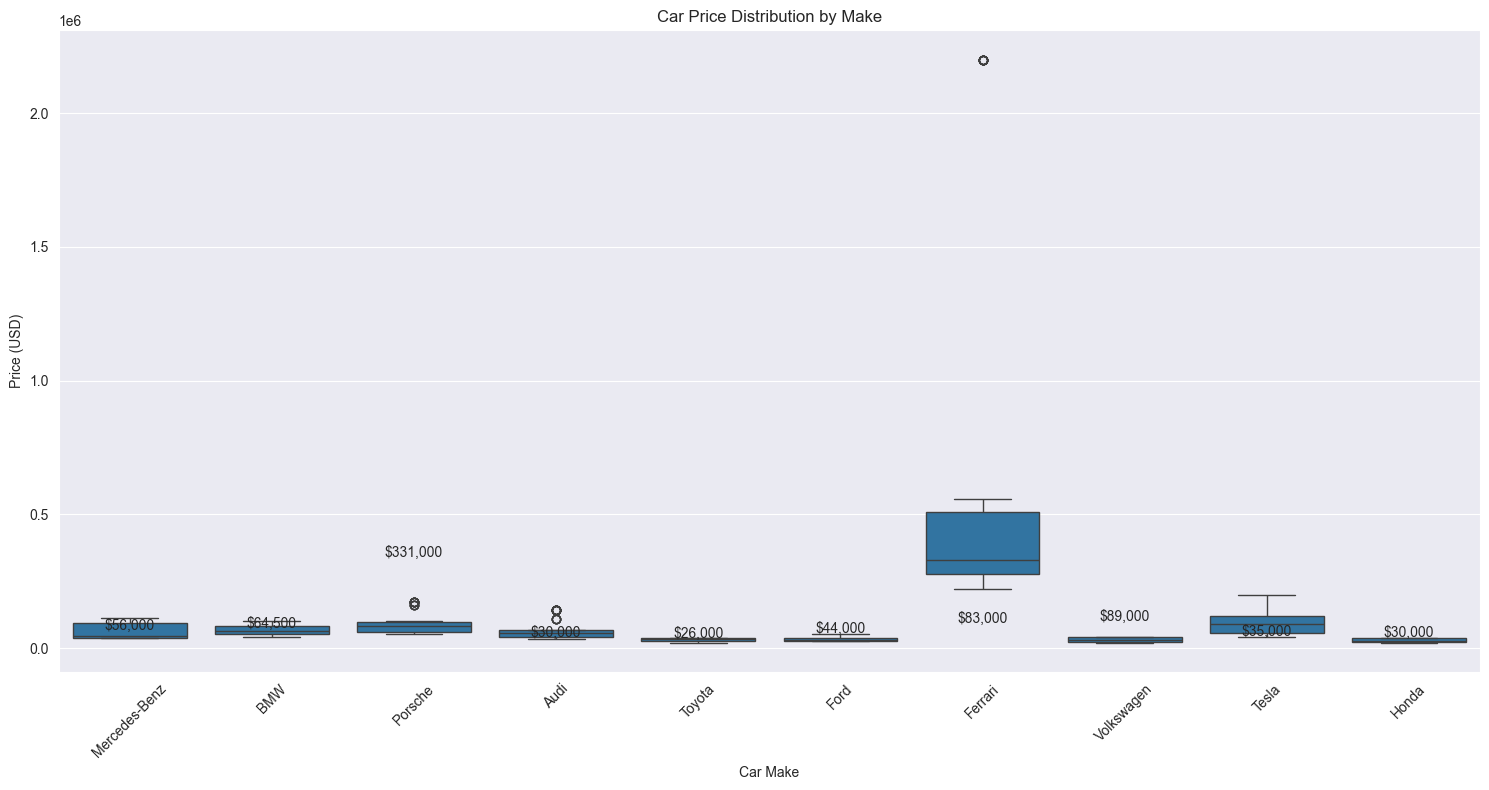


Price Statistics by Make:
               count           mean            std       min       25%  \
make                                                                     
Audi           112.0   65026.785714   35469.682479   35000.0   40000.0   
BMW            104.0   67923.076923   19697.563946   41000.0   52000.0   
Ferrari        102.0  541823.529412  587154.784386  222000.0  276000.0   
Ford           115.0   33600.000000    7906.027015   25000.0   27000.0   
Honda           86.0   29476.744186    7335.212005   19000.0   24000.0   
Mercedes-Benz   79.0   62265.822785   29591.539358   37000.0   39000.0   
Porsche         82.0   88670.731707   36833.980178   54000.0   61000.0   
Tesla          133.0   92909.774436   47704.814992   40000.0   55000.0   
Toyota         105.0   30695.238095    6194.171903   20000.0   25000.0   
Volkswagen      82.0   30524.390244    7496.872780   19000.0   24000.0   

                    50%       75%        max  
make                                 

In [19]:
analyze_price_by_make(df)



# 2. Question: 
## Create a pie chart showing the distribution of car makes in the dataset, with an inner circle showing gender distribution to analyze any gender preferences in car makes.

In [20]:
def analyze_make_gender_distribution(df):
    # Outer pie - Car makes
    make_dist = df['make'].value_counts()
    
    # Inner pie - Gender
    gender_dist = df['gender'].value_counts()
    
    # Create donut chart
    plt.figure(figsize=(12, 12))
    
    # Outer pie
    plt.pie(make_dist, labels=make_dist.index, autopct='%1.1f%%', radius=1.3,
            pctdistance=0.85, labeldistance=1.0)
    
    # Inner pie
    plt.pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%', radius=1,
            pctdistance=0.75, colors=['lightblue', 'lightpink'])
    
    plt.title('Car Makes Distribution (Outer) vs Gender Distribution (Inner)')
    plt.show()
    
    # Print cross-tabulation
    print("\nCar Make Preference by Gender:")
    print(pd.crosstab(df['make'], df['gender'], normalize='columns') * 100)

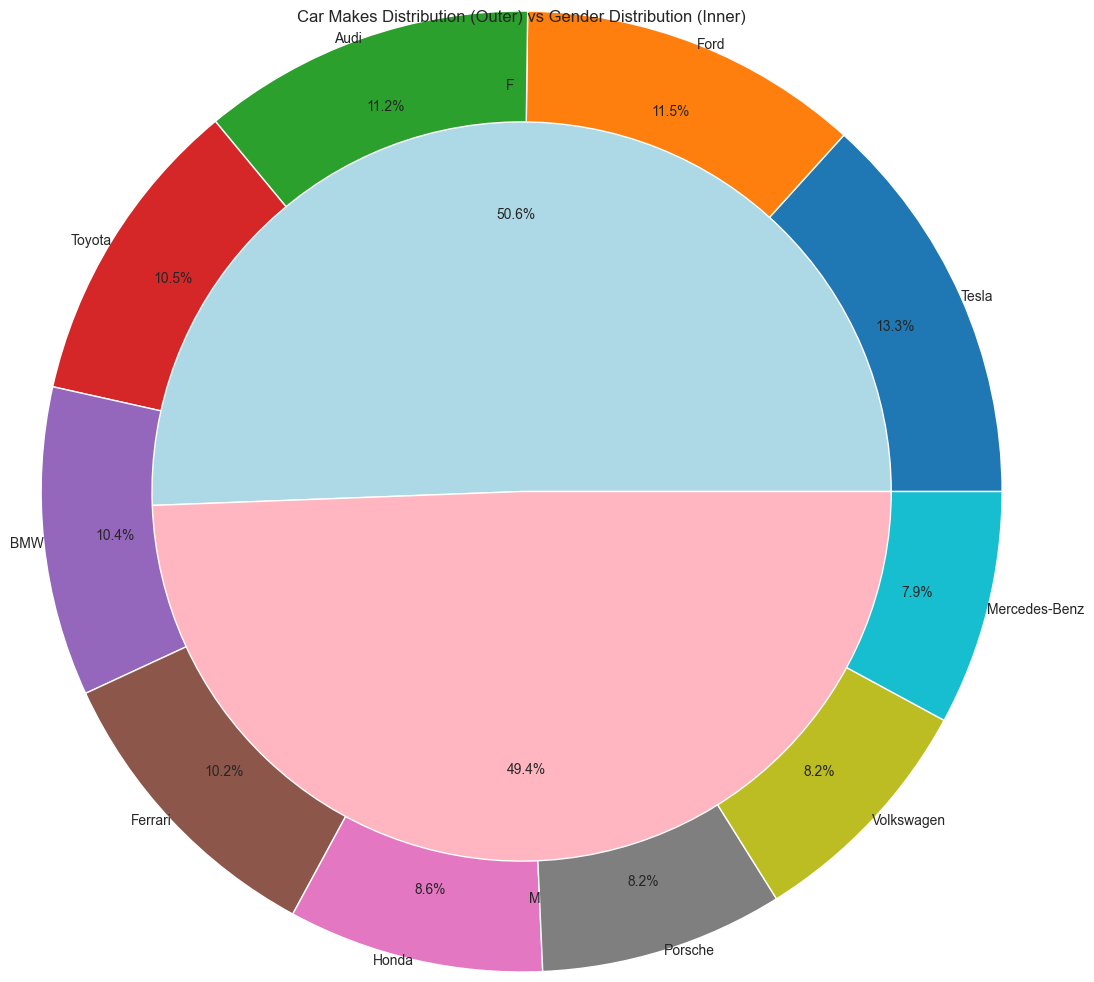


Car Make Preference by Gender:
gender                 F          M
make                               
Audi           11.660079  10.728745
BMW            10.869565   9.919028
Ferrari        10.276680  10.121457
Ford           12.450593  10.526316
Honda           7.509881   9.716599
Mercedes-Benz   9.090909   6.680162
Porsche         7.509881   8.906883
Tesla          12.648221  13.967611
Toyota         11.264822   9.716599
Volkswagen      6.719368   9.716599


In [21]:
analyze_make_gender_distribution(df)

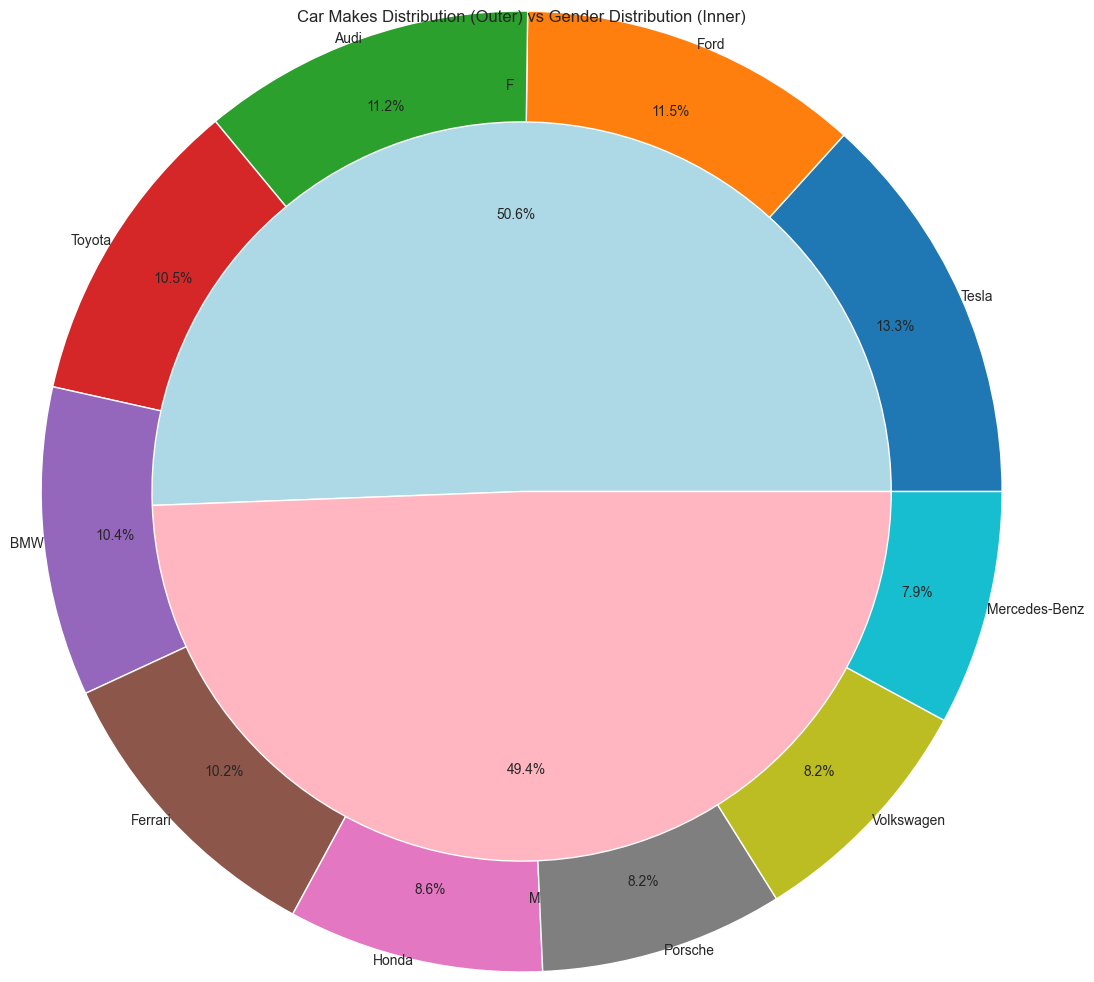


Car Make Preference by Gender:
gender                 F          M
make                               
Audi           11.660079  10.728745
BMW            10.869565   9.919028
Ferrari        10.276680  10.121457
Ford           12.450593  10.526316
Honda           7.509881   9.716599
Mercedes-Benz   9.090909   6.680162
Porsche         7.509881   8.906883
Tesla          12.648221  13.967611
Toyota         11.264822   9.716599
Volkswagen      6.719368   9.716599


In [22]:
analyze_make_gender_distribution(df)


# 3. Question: 
## Create a histogram grid showing the distribution of start dates for each car make to analyze temporal patterns in car ownership.

In [23]:
def analyze_temporal_patterns(df):
    # Convert start dates to years
    df['start_year'] = df['start'].dt.year
    
    # Create subplot grid
    makes = df['make'].unique()
    rows = (len(makes) + 2) // 3  # Calculate needed rows
    
    fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
    axes = axes.flatten()
    
    for idx, make in enumerate(makes):
        make_data = df[df['make'] == make]['start_year']
        sns.histplot(data=make_data, ax=axes[idx], bins=20)
        axes[idx].set_title(f'{make} - Start Year Distribution')
        axes[idx].set_xlabel('Year')
        axes[idx].set_ylabel('Count')
    
    # Remove empty subplots if any
    for idx in range(len(makes), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()
    
    # Print yearly statistics
    print("\nYearly Car Ownership Stats by Make:")
    print(df.pivot_table(index='start_year', columns='make', values='price', aggfunc='count').fillna(0))
    


In [24]:
analyze_temporal_patterns(df)

AttributeError: Can only use .dt accessor with datetimelike values



# 4. Question: 
## Create a scatter plot of location coordinates colored by price ranges, with point sizes representing customer tenure, to visualize geographical price distribution and customer loyalty patterns.

In [25]:
def analyze_geo_price_patterns(df):
    # Calculate tenure
    df['tenure'] = (df['end'].fillna(datetime.now()) - df['start']).dt.days
    
    # Create price categories
    df['price_category'] = pd.qcut(df['price'], q=4, labels=['Budget', 'Mid-range', 'Premium', 'Luxury'])
    # Create scatter plot
    plt.figure(figsize=(15, 10))
    
    scatter = plt.scatter(df['location_longitude'].astype(float), 
                         df['location_latitude'].astype(float),
                         c=pd.factorize(df['price_category'])[0],
                         s=df['tenure']/30,  # Scale down tenure for better visualization
                         alpha=0.6,
                         cmap='viridis')
    
    plt.colorbar(scatter, label='Price Category')
    plt.title('Geographical Distribution of Cars by Price and Customer Tenure')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    
    # Add legend for price categories
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                                label=cat,
                                markerfacecolor=plt.cm.viridis(i/3),
                                markersize=10)
                      for i, cat in enumerate(df['price_category'].unique())]
    plt.legend(handles=legend_elements, title='Price Category',
              bbox_to_anchor=(1.15, 1))
    
    plt.tight_layout()
    plt.show()

In [26]:
analyze_geo_price_patterns(df)

TypeError: unsupported operand type(s) for -: 'datetime.datetime' and 'str'


# 5. Question: 
## Create a stacked bar chart showing the count of active vs inactive customers (based on end date) for each car make, split by gender, to analyze customer retention patterns across different brands and genders.

In [27]:
def analyze_retention_patterns(df):
    # Create status column
    df['status'] = np.where(df['end'].isnull(), 'Active', 'Inactive')
    
    # Create pivot table
    pivot_data = pd.pivot_table(df,
                               values='first_name',  # Use any column for counting
                               index=['make'],
                               columns=['status', 'gender'],
                               aggfunc='count',
                               fill_value=0)
    
    # Plot stacked bar chart
    ax = pivot_data.plot(kind='bar', stacked=True, figsize=(15, 8))
    plt.title('Customer Status by Make and Gender')
    plt.xlabel('Car Make')
    plt.ylabel('Number of Customers')
    plt.legend(title='Status - Gender', bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for c in ax.containers:
        ax.bar_label(c, label_type='center')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nRetention Statistics:")
    retention_stats = df.groupby('make').agg({
        'status': lambda x: (x == 'Active').mean() * 100,
        'gender': lambda x: (x == 'F').mean() * 100
    }).round(2)
    retention_stats.columns = ['Active Customer %', 'Female Customer %']
    print(retention_stats)

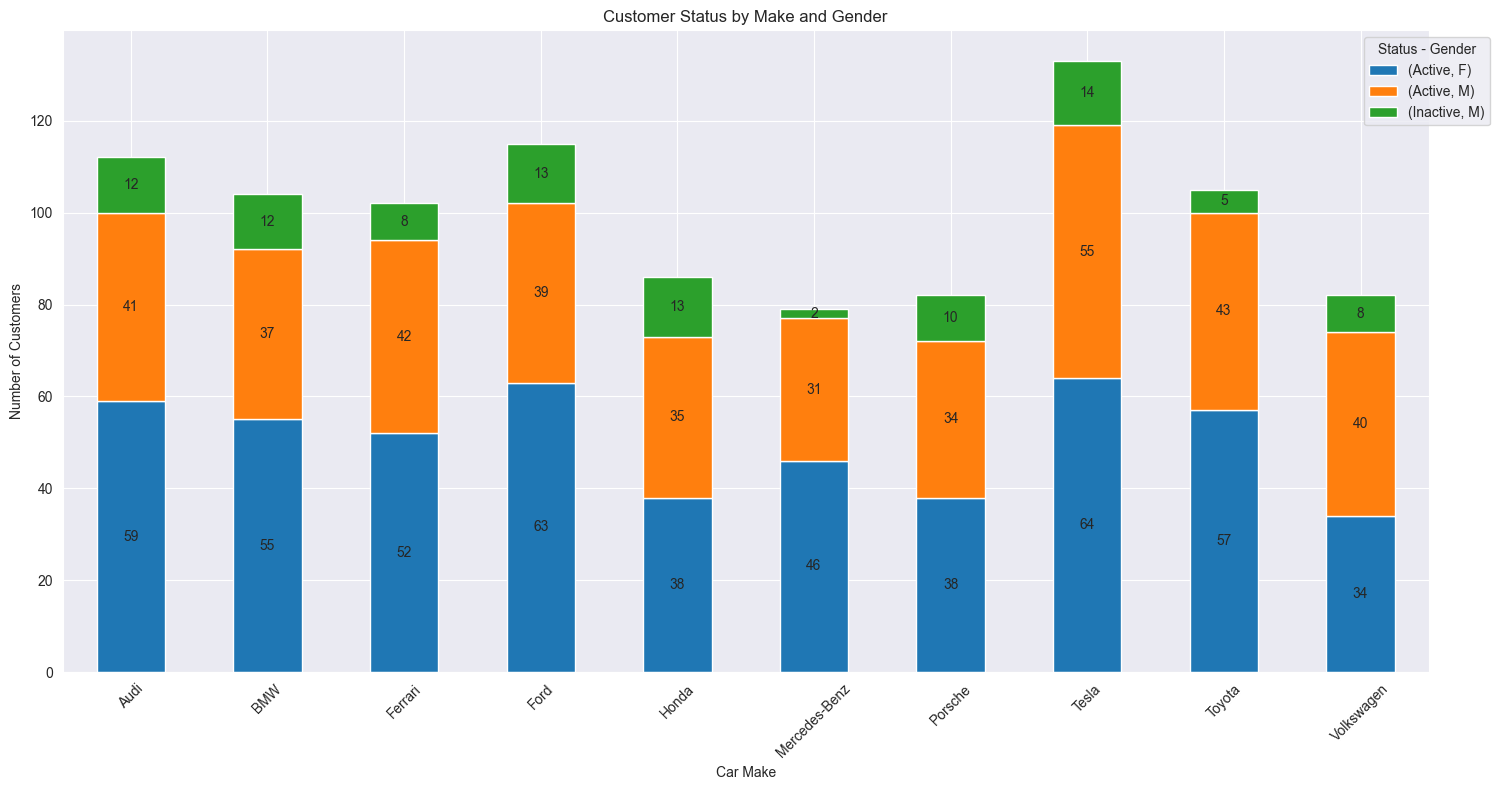


Retention Statistics:
               Active Customer %  Female Customer %
make                                               
Audi                       89.29              52.68
BMW                        88.46              52.88
Ferrari                    92.16              50.98
Ford                       88.70              54.78
Honda                      84.88              44.19
Mercedes-Benz              97.47              58.23
Porsche                    87.80              46.34
Tesla                      89.47              48.12
Toyota                     95.24              54.29
Volkswagen                 90.24              41.46


In [28]:
analyze_retention_patterns(df)

In [ ]:
# def run_all_analyses():
#     analyze_price_by_make()
#     analyze_make_gender_distribution()
#     analyze_temporal_patterns()
#     analyze_geo_price_patterns()
#     analyze_retention_patterns()